In [1]:
import os
import re
from tqdm.notebook import tqdm
from pathlib import Path
from natsort import natsorted
from glob import glob

In [7]:
import numpy as np
seg=np.load(r"Y:\my_data\Mosaic\20240311 FUCCI halo sorted col_glass high_density\segmented\FUCCI-stage_1\FUCCI-stage_1-000_seg.npy", allow_pickle=True).item()

In [8]:
from cellpose import utils

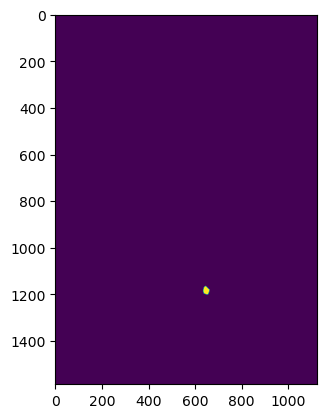

In [12]:
import matplotlib.pyplot as plt
plt.imshow(seg['masks']==781)

In [15]:
seg['outlines_list'].append(utils.outlines_list(seg['masks']==781)[0])

In [16]:
np.save(r"Y:\my_data\Mosaic\20240311 FUCCI halo sorted col_glass high_density\segmented\FUCCI-stage_1\FUCCI-stage_1-000_seg.npy", seg)

In [5]:
root_dir=Path(r'Y:\raw_data\Mosaic')
dataset='20240323 FUCCI halo sort1 col_glass colonies'

# rename dataset folder to 'raw'
dataset_path=root_dir/dataset
dataset_path.rename(root_dir/'raw')

# create new dataset folder
dataset_path.mkdir()

# place raw data in new dataset folder
raw_data_path=root_dir/'raw'
for f in tqdm(raw_data_path.iterdir()):
    f.rename(dataset_path/f.name)

0it [00:00, ?it/s]

# Move data

In [33]:
os.rename('test_folder', 'placeholder')

os.rename('test_folder2', 'test_folder')
os.rename('placeholder/raw', 'test_folder/raw')
os.remove('placeholder')

## Create raw data subfolders

In [46]:
raw_data_dir=r'Y:\raw_data\2023'

folders=natsorted(glob(raw_data_dir+'/*/'))

In [47]:
# check if 'raw' subfolder exists
for folder in tqdm(folders):
    if os.path.isdir(folder+'raw'):
        print('RAW DIRECTORY ALREADY EXISTS FOR '+folder)
        continue
    
    print('creating raw subdirectory for ', folder)
    # move all files to 'raw' subfolder
    os.rename(folder, raw_data_dir+'raw')
    os.mkdir(folder)

    os.rename(raw_data_dir+'raw', folder+'raw')

  0%|          | 0/34 [00:00<?, ?it/s]

creating raw subdirectory for  Y:\raw_data\2023\20230126 halo stretcher - water dries\
creating raw subdirectory for  Y:\raw_data\2023\20230129 halo stretcher - subconfluent\
creating raw subdirectory for  Y:\raw_data\2023\20230202 cellmask stretcher - cells stop adhering\
creating raw subdirectory for  Y:\raw_data\2023\20230216 cellmask stretcher - UV fractures PDMS\
creating raw subdirectory for  Y:\raw_data\2023\20230305 halo glass lines - good for 4h\
creating raw subdirectory for  Y:\raw_data\2023\20230306 GFP fib488 glass lines - medium dries\
creating raw subdirectory for  Y:\raw_data\2023\20230322 halo glass lines - no incubator\
creating raw subdirectory for  Y:\raw_data\2023\20230327 halo stretcher - 3rotations cells unhappy\
creating raw subdirectory for  Y:\raw_data\2023\20230328 GFP glass parafilm - heater toggled\
creating raw subdirectory for  Y:\raw_data\2023\20230329 GFP PDMS parafilm - heater\
creating raw subdirectory for  Y:\raw_data\2023\20230405 GFP EDC-NHS - good

## Merge Data and Segmentation Folders w/ raw_data

In [56]:
import shutil
help(shutil.copytree)

Help on function copytree in module shutil:

copytree(src, dst, symlinks=False, ignore=None, copy_function=<function copy2 at 0x000001F38FCEAF20>, ignore_dangling_symlinks=False, dirs_exist_ok=False)
    Recursively copy a directory tree and return the destination directory.
    
    If exception(s) occur, an Error is raised with a list of reasons.
    
    If the optional symlinks flag is true, symbolic links in the
    source tree result in symbolic links in the destination tree; if
    it is false, the contents of the files pointed to by symbolic
    links are copied. If the file pointed by the symlink doesn't
    exist, an exception will be added in the list of errors raised in
    an Error exception at the end of the copy process.
    
    You can set the optional ignore_dangling_symlinks flag to true if you
    want to silence this exception. Notice that this has no effect on
    platforms that don't support os.symlink.
    
    The optional ignore argument is a callable. If give

In [59]:
shutil.copytree('test_folder/raw', 'test_folder2', dirs_exist_ok=True)

'test_folder2'

In [60]:
data_dir=r'Y:\Data'
folders=natsorted(glob(data_dir+'/2023*/'))

raw_data_dir=r'Y:\raw_data\2023'
for folder in tqdm(folders):
    # get dataset name
    dataset=Path(folder).stem # dataset name
    raw_data_folder=raw_data_dir+'/'+dataset

    # check if dataset exists in raw_data_dir
    if os.path.isdir(raw_data_folder):
        print(raw_data_folder+' exists, moving files')
    else:
        print(raw_data_folder+' DOES NOT EXIST! Skipping...')
        continue

    # move all files to 'raw' subfolder
    os.rename(raw_data_folder, raw_data_dir+'/placeholder')
    os.rename(folder, raw_data_folder)
    os.rename(raw_data_dir+'/placeholder/raw', raw_data_folder+'/raw')
    os.rmdir(raw_data_dir+'/placeholder')

  0%|          | 0/8 [00:00<?, ?it/s]

Y:\my_data\2023/20230508 halo glass lines incubator - good glass exists, moving files
Y:\my_data\2023/20230511 halo PDMS lines incubator - dense exists, moving files


PermissionError: [WinError 5] Access is denied: 'Y:\\my_data\\2023/20230511 halo PDMS lines incubator - dense' -> 'Y:\\my_data\\2023/placeholder'

In [73]:
data_dir=r'Y:\Segmentation'
folders=natsorted(glob(data_dir+'/2024*/'))

raw_data_dir=r'Y:\my_data\Mosaic'
for folder in tqdm(folders):
    # get dataset name
    dataset=Path(folder).stem # dataset name
    raw_data_folder=raw_data_dir+'/'+dataset

    # check if dataset exists in raw_data_dir
    if os.path.isdir(raw_data_folder):
        print(raw_data_folder+' exists, moving files')
    else:
        print(raw_data_folder+' DOES NOT EXIST! Skipping...')
        continue

    # move all subfolders from folder to raw_data_folder
    for subfolder in os.listdir(folder):
        os.rename(folder+'/'+subfolder, raw_data_folder+'/'+subfolder)

    try:
        os.rmdir(folder)
    except Exception as e:
        print(f'Error {e}, could not remove {folder}')
        continue

  0%|          | 0/1 [00:00<?, ?it/s]

Y:\my_data\Mosaic/20240218 a-cat KO 32 - epi exists, moving files


# Rename

In [12]:
# find all .TIF files in directory
directory=r'C:\Users\Andy\Desktop\Heather_temp\NORI\50k'
files = natsorted([f for f in os.listdir(directory) if f.endswith('.tif')])
files

['ROI001.tif',
 'ROI002.tif',
 'ROI003.tif',
 'ROI004.tif',
 'ROI005.tif',
 'ROI006.tif',
 'ROI007.tif',
 'ROI008.tif',
 'ROI009.tif',
 'ROI010.tif',
 'ROI011.tif',
 'ROI012.tif',
 'ROI013.tif',
 'ROI014.tif',
 'ROI015.tif',
 'ROI016.tif',
 'ROI017.tif',
 'ROI018.tif',
 'ROI019.tif',
 'ROI020.tif']

In [13]:
for n, f in enumerate(tqdm(files)):
    renamed=f'p1_50k-{n}_NORI.tif'
    os.rename(directory+'/'+f, directory+'/'+renamed)

  0%|          | 0/20 [00:00<?, ?it/s]

In [10]:
# increment the last number in the filename by 112
for f in tqdm(files):
    new_f = re.sub(r'(\d+)(?=\.\w+$)', lambda m: str(int(m.group()) + 112), f)
    os.rename(os.path.join(directory, f), os.path.join(directory, new_f))

  0%|          | 0/256 [00:00<?, ?it/s]

In [4]:
directory=r'Z:\Andy\raw_data\20240622 FUCCI halo\SC\subtracted'
files=[f for f in os.listdir(directory) if f.startswith('tile') and f.endswith('.tif')]

for f in tqdm(files):
    # replace 'tile' with 'membrane'
    new_f = re.sub('tile', 'membrane', f)
    os.rename(os.path.join(directory, f), os.path.join(directory, new_f))

  0%|          | 0/9 [00:00<?, ?it/s]

# Change stitching fluor

In [16]:
directory=r'Y:\raw_data\20240705 FUCCI halo 3days\ME replenish\subtracted'
files=[f for f in os.listdir(directory) if f.endswith('registered.txt')]
print(files)

current_fluor='w2561zyla'
new_fluor='w1491zyla'
zstack=False

for f in tqdm(files):
    with open(os.path.join(directory, f), 'r') as file:
        filedata = file.read()
    filedata = filedata.replace(current_fluor, new_fluor)
    if zstack:
        filedata = filedata.replace('dim = 2', 'dim = 3')
        filedata = filedata.replace(')', ', 0.0)')
    else:
        if 'dim = 3' in filedata:
            filedata = filedata.replace('dim = 3', 'dim = 2')
            filedata = filedata.replace(', 0.0)', ')')
    with open(os.path.join(directory, f), 'w') as file:
        file.write(filedata)

['tile7.registered.txt', 'tile2.registered.txt', 'tile5.registered.txt', 'tile3.registered.txt', 'tile4.registered.txt', 'tile6.registered.txt', 'tile1.registered.txt', 'tile8.registered.txt']


  0%|          | 0/8 [00:00<?, ?it/s]